# Dimensionality Reduction (PCA / AutoEncoder)

## PCA

### Import packages 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Scikit learn tools
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

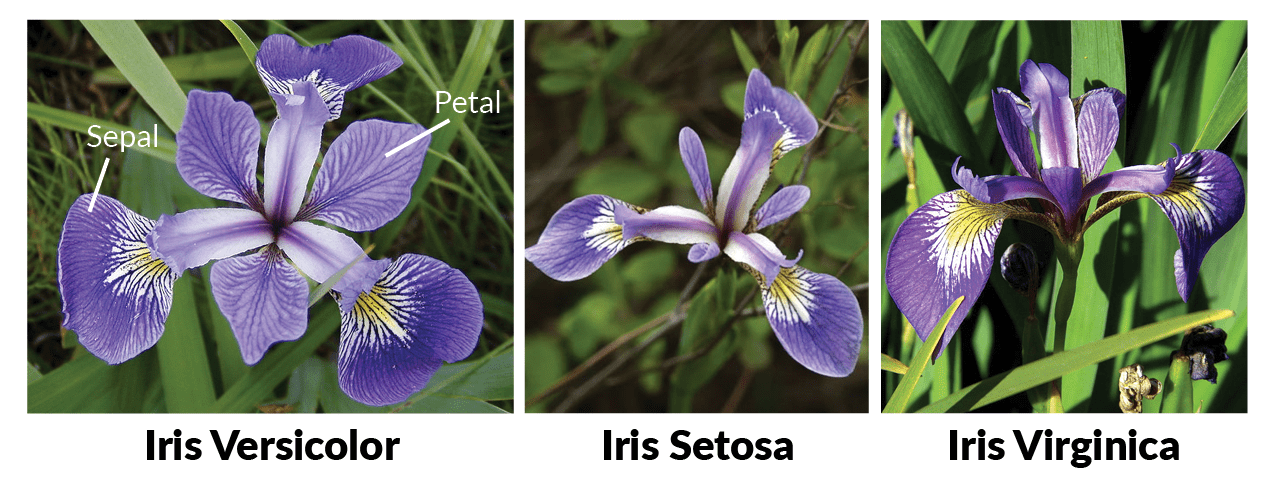
# **Data Structure**
**Features:**
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

**classes:**
[0] Iris Setosa
[1] Iris Versicolour
[2] Iris Virginica

In [2]:
# Load the data
iris = load_iris()
Features = iris.data
label = iris.target

In [3]:
# Shape of the original data
print("Features shape: ",Features.shape)
print("label shape: ", label.shape)

Features shape:  (150, 4)
label shape:  (150,)


### Let's give Logistic Regression a try to classify the data

In [4]:
# Normalize and Split the data
X = normalize(Features)
y= label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [5]:
# Train the Logistic Regression model on the original data (4 features)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [6]:
# Accuracy score for the original data
print("Test Acc.: ", accuracy_score(y_test, y_pred_test))

Test Acc.:  0.8666666666666667


## PCA using Sklearn

In [7]:
X = (Features - np.mean(Features, axis=0)) / (np.std(Features, axis=0))

### 1 Dimension

In [8]:
## sklearn.decomposition.PCA

# Project data to 2D space (2 principal components)
pc = PCA(n_components=1)
x_pca = pc.fit_transform(X)

## Shape of the projected data
print(x_pca.shape)

(150, 1)


In [9]:
# Variance of each principal component
print(pc.explained_variance_ratio_)
print('Cumulative variance captured ' , sum(pc.explained_variance_ratio_))

[0.72962445]
Cumulative variance captured  0.7296244541329985


Text(0, 0.5, 'Label')

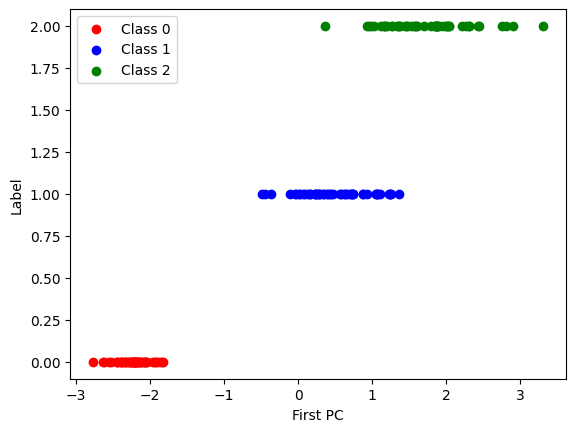

In [10]:
plt.scatter(x_pca[:50], label[:50], c='red', label='Class 0')
plt.scatter(x_pca[50:100], label[50:100], c='blue', label='Class 1')
plt.scatter(x_pca[100:150], label[100:150], c='green', label='Class 2')
plt.legend()
plt.xlabel("First PC")
plt.ylabel("Label")

In [11]:
# Split the projected data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=29)

In [12]:
# Train the Logistic Regression model on the porjected data (2 features)
LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca, y_train_pca)
y_pred_pca_train = LR_pca.predict(X_train_pca)
y_pred_pca_test = LR_pca.predict(X_test_pca)

In [13]:
# Accuracy score for the original data
print("Test Acc.: ", accuracy_score(y_test_pca, y_pred_pca_test))

Test Acc.:  0.8


### 2 Dimensions

In [14]:
# Project data to 2D space (2 principal components)
pc = PCA(n_components=2)
x_pca = pc.fit_transform(X)

# # Shape of the projected data
print(x_pca.shape)

(150, 2)


In [15]:
# Variance of each principal component
print(pc.explained_variance_ratio_)
print('Cumulative variance captured ' , sum(pc.explained_variance_ratio_))

[0.72962445 0.22850762]
Cumulative variance captured  0.9581320720000164


Text(0, 0.5, 'Second Principal Component')

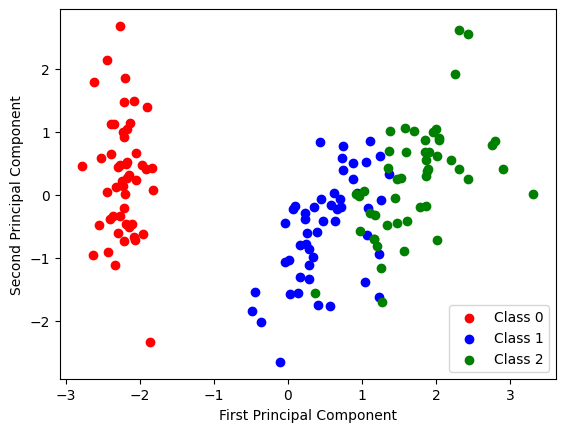

In [16]:
plt.scatter(x_pca[:50,0], x_pca[:50, 1], c='red', label='Class 0')
plt.scatter(x_pca[50:100,0], x_pca[50:100, 1], c='blue', label='Class 1')
plt.scatter(x_pca[100:150,0], x_pca[100:150, 1], c='green', label='Class 2')
plt.legend()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [17]:
# Split the projected data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=29)

In [18]:
# Train the Logistic Regression model on the porjected data (2 features)
LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca, y_train_pca)
y_pred_pca_train = LR_pca.predict(X_train_pca)
y_pred_pca_test = LR_pca.predict(X_test_pca)

In [19]:
# Accuracy score for the original data
print("Test Acc.: ", accuracy_score(y_test_pca, y_pred_pca_test))

Test Acc.:  0.8


# PCA without sklearn

Features shape:  (150, 4)
First Sample:  [5.1 3.5 1.4 0.2]
Mean of Featues:  [5.84333333 3.05733333 3.758      1.19933333]


Text(0.5, 0, 'samples')

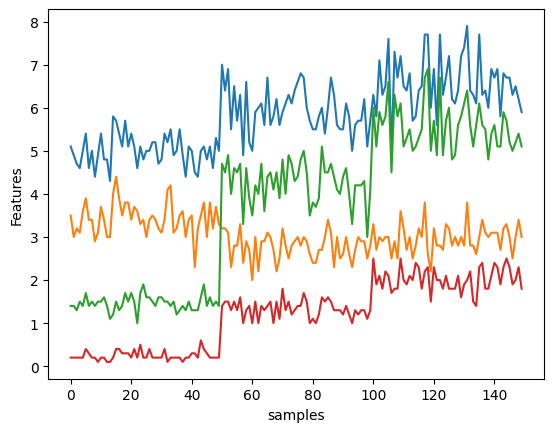

In [20]:
print("Features shape: ", Features.shape)
print("First Sample: ", Features[0])
print("Mean of Featues: ", np.mean(Features, axis=0))
plt.plot(Features)
plt.ylabel("Features")
plt.xlabel("samples")

### Step 1: Normalize Features

Normalized Features shape:  (150, 4)
Normalized Features First Sample:  [-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


Text(0.5, 0, 'samples')

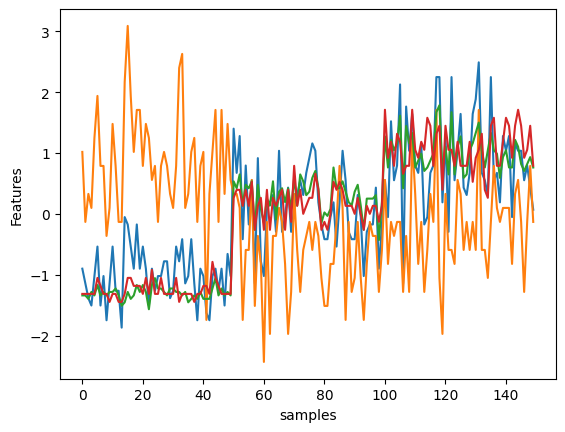

In [21]:
X = (Features - np.mean(Features, axis=0)) / (np.std(Features, axis=0))
print("Normalized Features shape: ", X.shape)
print("Normalized Features First Sample: ", X[0])
plt.plot(X)
plt.ylabel("Features")
plt.xlabel("samples")

### Step 2: Covariance and Eigenvalues

In [22]:
# Perform eigen decomposition and Return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    # Compute the Covariance
    cov = (1/X.shape[0])*(X.T.dot(X))
    
    # Eigen Decomposition 
    eig_vals, eig_vecs = np.linalg.eig(cov)
    
    # Sort the eigen pairs in desecending order of eigen values
    index = np.argsort(eig_vals)
    sorted_eig_vals = eig_vals[index]
    sorted_eig_vals = sorted_eig_vals[::-1]
    sorted_eig_vecs = eig_vecs[:,index]
    sorted_eig_vecs = sorted_eig_vecs[:,::-1]
    
    return (sorted_eig_vals, sorted_eig_vecs)

In [23]:
# Eigen Decomposition
sorted_eig_vals, sorted_eig_vecs = eigendecomp(X)
print("Sorted EigenValues: ", sorted_eig_vals)

Sorted EigenValues:  [2.91849782 0.91403047 0.14675688 0.02071484]


### Step 3: Explained Variance for each k

In [24]:
# Evaluate using variance_explained as the metric
def eval(X):
    # Reduce the dimensionality to k
    ve_all = []
    print("variance explained when reducing the dimensionality to k")
    for k in range(X.shape[0]):
        print(f"k = {k+1}")
        ve = X[0:k+1].sum()/X.sum()
        print(f"variance explained = {ve}")
        ve_all.append(ve)
    print("\n")
    
    # Compute the variance explained for each eigenvalue
    print("variance explained for each eigenvalue")
    for i in range(len(ve_all)):
        print(f"The {i+1}th eigenvalue: {X[i]}")
        if i == 0:
            print(f"variance explained = {ve_all[i]}")
        else:
            print(f"variance explained = {ve_all[i]-ve_all[i-1]}")

In [25]:
eval(sorted_eig_vals)

variance explained when reducing the dimensionality to k
k = 1
variance explained = 0.7296244541329988
k = 2
variance explained = 0.9581320720000164
k = 3
variance explained = 0.9948212908928451
k = 4
variance explained = 1.0


variance explained for each eigenvalue
The 1th eigenvalue: 2.9184978165319966
variance explained = 0.7296244541329988
The 2th eigenvalue: 0.9140304714680705
variance explained = 0.22850761786701757
The 3th eigenvalue: 0.14675687557131492
variance explained = 0.03668921889282872
The 4th eigenvalue: 0.020714836428619876
variance explained = 0.0051787091071549


In [26]:
x_pca = np.dot(X, sorted_eig_vecs[:,0:2])

Text(0, 0.5, 'Second Principal Component')

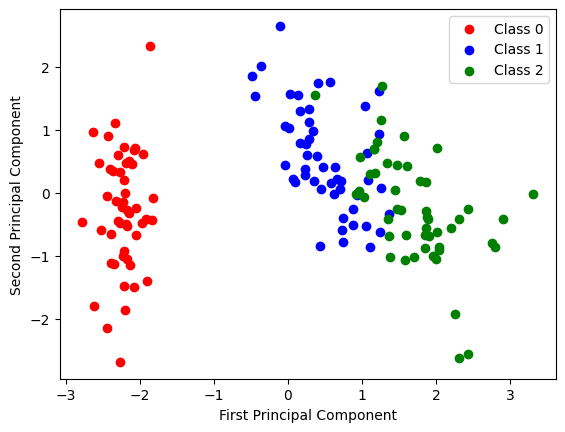

In [27]:
plt.scatter(x_pca[:50,0], x_pca[:50, 1], c='red', label='Class 0')
plt.scatter(x_pca[50:100,0], x_pca[50:100, 1], c='blue', label='Class 1')
plt.scatter(x_pca[100:150,0], x_pca[100:150, 1], c='green', label='Class 2')
plt.legend()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

PCA only works for linear data, otherwise autoencoders are needed.

## Face reconstruction from PCA



In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


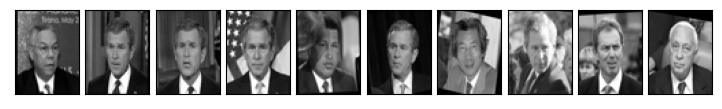

In [29]:
fig, axes = plt.subplots(1, 10, figsize=(9, 2),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='binary_r')

In [30]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In [31]:
print(faces.data.shape)
print(pca.components_.shape)

(1348, 2914)
(150, 2914)


In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

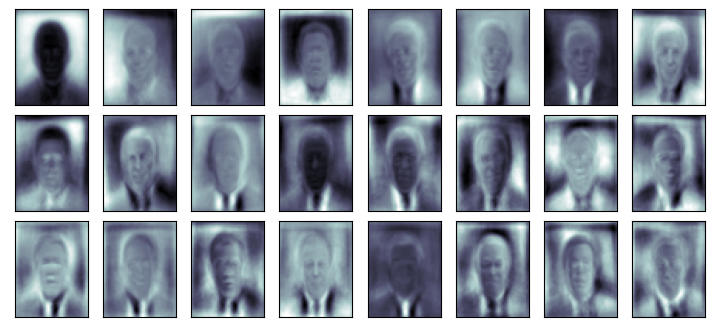

In [32]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

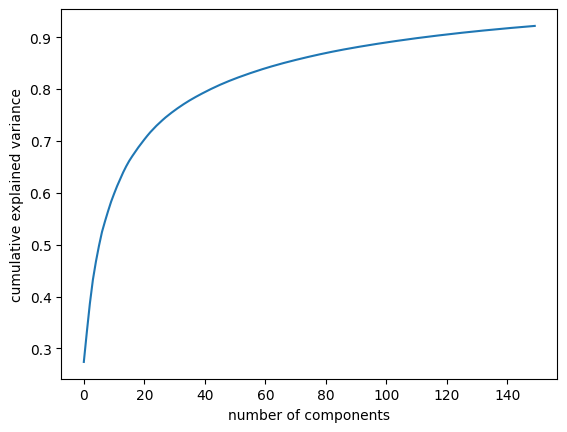

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [34]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

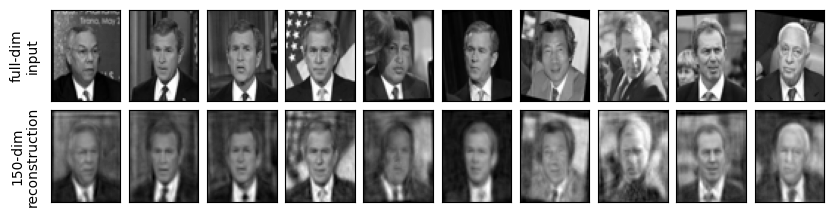

In [35]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear why PCA was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

In [36]:
# install pytorch (http://pytorch.org/) if run from Google Colaboratory
import sys

%matplotlib inline
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

Parameter Settings
-------------------

In [37]:
latent_dims = 10
num_epochs = 50
batch_size = 128
capacity = 64
learning_rate = 1e-3
use_gpu = True

MNIST Data Loading
-------------------

MNIST images show digits from 0-9 in 28x28 grayscale images. We normalize and center them around 0, which gives a slight performance boost during training.
We create both a training set and a test set.

In [38]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data/MNIST', download=True, train=True, transform=img_transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data/MNIST', download=True, train=False, transform=img_transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

4.3%

100.0%


Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw


100.0%


Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw




21.9%

100.0%


Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



100.0%

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



In [39]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        c = capacity
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=c, kernel_size=4, stride=2, padding=1) # out: c x 14 x 14
        self.conv2 = nn.Conv2d(in_channels=c, out_channels=c*2, kernel_size=4, stride=2, padding=1) # out: c x 7 x 7
        self.fc = nn.Linear(in_features=c*2*7*7, out_features=latent_dims)
            
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1) # flatten batch of multi-channel feature maps to a batch of feature vectors
        x = self.fc(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        c = capacity
        self.fc = nn.Linear(in_features=latent_dims, out_features=c*2*7*7)
        self.conv2 = nn.ConvTranspose2d(in_channels=c*2, out_channels=c, kernel_size=4, stride=2, padding=1)
        self.conv1 = nn.ConvTranspose2d(in_channels=c, out_channels=1, kernel_size=4, stride=2, padding=1)
            
    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), capacity*2, 7, 7) # unflatten batch of feature vectors to a batch of multi-channel feature maps
        x = F.relu(self.conv2(x))
        x = torch.tanh(self.conv1(x)) # last layer before output is tanh, since the images are normalized and 0-centered
        return x
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        latent = self.encoder(x)
        x_recon = self.decoder(latent)
        return x_recon
    
autoencoder = Autoencoder()

device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")
autoencoder = autoencoder.to(device)

num_params = sum(p.numel() for p in autoencoder.parameters() if p.requires_grad)
print('Number of parameters: %d' % num_params)

Number of parameters: 396171


Train Autoencoder
--------

In [40]:
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

# set to training mode
autoencoder.train()

train_loss_avg = []

print('Training ...')
for epoch in range(num_epochs):
    train_loss_avg.append(0)
    num_batches = 0
    
    for image_batch, _ in train_dataloader:
        
        image_batch = image_batch.to(device)
        
        # autoencoder reconstruction
        image_batch_recon = autoencoder(image_batch)
        
        # reconstruction error
        loss = F.mse_loss(image_batch_recon, image_batch)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        train_loss_avg[-1] += loss.item()
        num_batches += 1
        
    train_loss_avg[-1] /= num_batches
    print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, num_epochs, train_loss_avg[-1]))

Training ...


KeyboardInterrupt: 

Plot Training Curve
--------------------

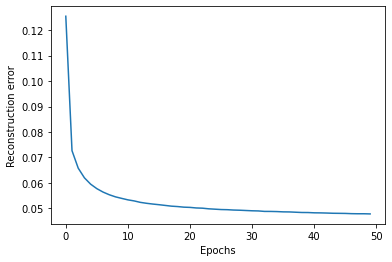

In [ ]:
import matplotlib.pyplot as plt
plt.ion()

fig = plt.figure()
plt.plot(train_loss_avg)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

Evaluate on the Test Set
-------------------------

In [ ]:
# set to evaluation mode
autoencoder.eval()

test_loss_avg, num_batches = 0, 0
for image_batch, _ in test_dataloader:
    
    with torch.no_grad():

        image_batch = image_batch.to(device)

        # autoencoder reconstruction
        image_batch_recon = autoencoder(image_batch)

        # reconstruction error
        loss = F.mse_loss(image_batch_recon, image_batch)

        test_loss_avg += loss.item()
        num_batches += 1
    
test_loss_avg /= num_batches
print('average reconstruction error: %f' % (test_loss_avg))

average reconstruction error: 0.048314


Visualize Reconstructions
--------------------------

Original images


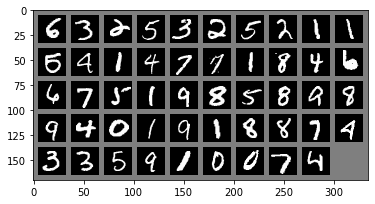

Autoencoder reconstruction:


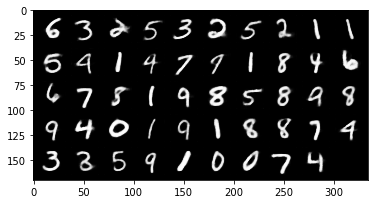

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

autoencoder.eval()

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualise_output(images, model):

    with torch.no_grad():

        images = images.to(device)
        images = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[1:50], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()
        
dataiter = iter(test_dataloader)
images , labels = next(dataiter)
# First visualise the original images
print('Original images')
show_image(torchvision.utils.make_grid(images[1:50],10,5))
plt.show()

# Reconstruct and visualise the images using the autoencoder
print('Autoencoder reconstruction:')
visualise_output(images, autoencoder)